
#Machine learning:
#Tarea programada 01
María Auxiliadora Mora

Instituto Tecnológico de Costa Rica,

Programa de Ciencias de Datos,

June 21, 2023

Entrega: Subir al TEC-Digital un archivo comprimido que contenga: Cuaderno de Jupyter y los archivos de datos, el original y el resultante.

Modo de trabajo: Grupos de 2 personas.

Estudiante 1: Gabriel Valentine Fonseca


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---

1. Cargar los datos y visualizar su contenido, utilice los gráficos y funciones
que considere aportan para entender cómo se comportan las variables. (5
puntos)








Utilizando la biblioteca pandas, se cargarán los datos en un DataFrame y se analizarán las primeras filas, la información de las columnas y las estadísticas descriptivas. Además, se utilizarán gráficos y visualizaciones para entender mejor la distribución y las relaciones entre las variables.

In [ ]:
#cargar los datos de google drive
from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Módulo 2/Tareas/Tarea 1/Dataset.csv'
archivo_sin_mod = '/content/drive/MyDrive/Colab Notebooks/Módulo 2/Tareas/Tarea 1/Dataset sin mod.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mostrar las primeras filas del DataFrame
df_sin_mod = pd.read_csv(archivo_sin_mod, header = 0, delimiter =';')
df = pd.read_csv(archivo, header = 0, delimiter =';')
colNames = df_sin_mod.columns
print(df_sin_mod.head())

# Obtener información sobre las columnas del DataFrame
print(df_sin_mod.info())

# Obtener estadísticas descriptivas de las columnas numéricas
print(df_sin_mod.describe())


  Sex  Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0   M   0.455     0.365   0.095  0.5140   medio   0.1010        0.150     15
1   M   0.350     0.265   0.090  0.2255   medio   0.0485        0.070      7
2   F   0.530     0.420   0.135  0.6770   medio   0.1415        0.210      9
3   M   0.440     0.365   0.125  0.5160   medio   0.1140        0.155     10
4   I   0.330     0.255   0.080  0.2050   medio   0.0395        0.055      7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          1000 non-null   object 
 1   Length       984 non-null    float64
 2   Diameter     1000 non-null   float64
 3   Height       1000 non-null   float64
 4   Whole        1000 non-null   float64
 5   Shucked      1000 non-null   object 
 6   Viscera      1000 non-null   float64
 7   Shellweight  1000 non-null   float64
 8   Rings   

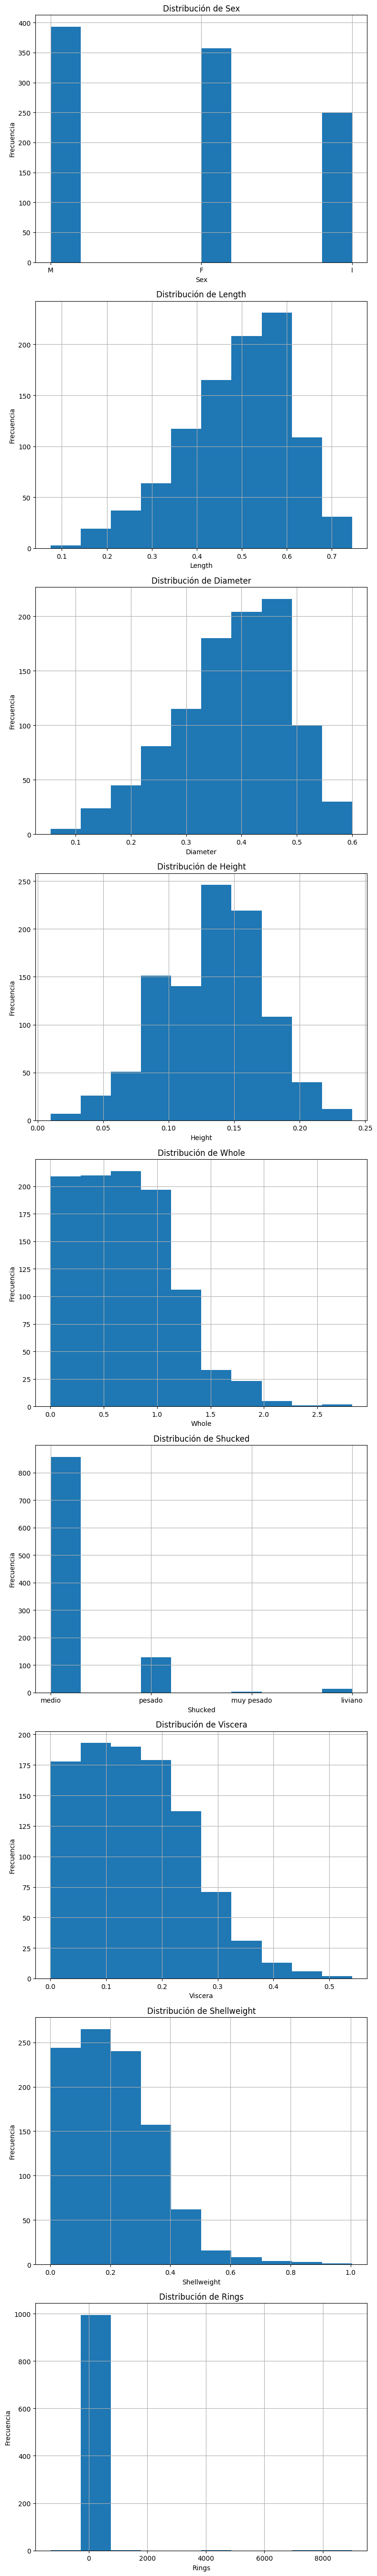

In [ ]:

# Obtener todas las columnas del DataFrame
variables = df_sin_mod.columns

# Configuración del tamaño de la figura
fig, axes = plt.subplots(len(variables), figsize=(8, 6*len(variables)))

# Bucle para crear los gráficos de cada variable
for i, variable in enumerate(variables):
    ax = axes[i]
    ax.hist(df[variable])
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {variable}')
    ax.grid(True)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



---

2. El atributo Shucked es ordinal, preprocéselo y justifique su selección. (5
puntos)



Se eligió utilizar el método OrdinalEncoder para preprocesar el atributo "Shucked" porque es capaz de asignar valores numéricos a las categorías de forma ordenada. Como el atributo "Shucked" se considera ordinal, es importante mantener el orden entre las categorías al procesar los datos. El OrdinalEncoder asigna automáticamente valores numéricos a las categorías, asegurando que la relación de orden se conserve.

In [ ]:
# Verificar valores nulos en la columna "Shucked"
print(df['Shucked'].isnull().sum())


0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# Ajustar y transformar los datos del atributo "Shucked"
encoded_values = ordinal_encoder.fit_transform(df[['Shucked']])

df['Shucked'] = encoded_values

# Imprimir los nuevos valores
nuevas_variables = ordinal_encoder.categories_
print(nuevas_variables)

[array(['liviano', 'medio', 'muy pesado', 'pesado'], dtype=object)]


---

3. El atributo Length tiene valores faltantes, realice imputación de datos y
justifique su selección. (5 puntos)



Se utilizó la función SimpleImputer para reemplazar los valores faltantes en el atributo Length con la media. Esto se debe a que SimpleImputer es fácil de usar y reemplazar por la media permite llenar los espacios vacíos con un valor promedio de los datos del atributo. Esta opción ayuda a mantener la consistencia de los datos y evitar problemas en el análisis.

In [ ]:
from sklearn.impute import SimpleImputer

# Contar los valores faltantes (0) en el atributo "Length" antes de la imputación
valores_faltantes_antes = df['Length'].isnull().sum()

print("Valores faltantes antes de la imputación: ", valores_faltantes_antes)


# Crear una instancia de SimpleImputer con la estrategia de imputación por la media
imputer = SimpleImputer(strategy='mean')

# Realizar la imputación de datos en el atributo "Length"
df['Length'] = imputer.fit_transform(df[['Length']])

# Contar los valores faltantes en el atributo "Length" después de la imputación

valores_faltantes_despues = df['Length'].isnull().sum()

print("Valores faltantes después de la imputación: ", valores_faltantes_despues)


Valores faltantes antes de la imputación:  16
Valores faltantes después de la imputación:  0


---

4. El atributo Rings tienen valores atípicos (outliers) proponga cómo corregirlo (investigue) y hágalo, justifique su selección. (5 puntos)


El método de los límites de Tukey es una buena opción para corregir los outliers. Es ampliamente utilizado y considerado confiable debido a su capacidad para identificar valores atípicos basándose en la distribución de los datos. Al establecer límites utilizando el rango intercuartílico, este método evita la influencia de valores extremos. Además, es fácil de implementar.

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = np.percentile(df['Rings'], 25)
Q3 = np.percentile(df['Rings'], 75)
IQR = Q3 - Q1

# Calcular los límites de Tukey para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = (df['Rings'] < limite_inferior) | (df['Rings'] > limite_superior)

# Corregir los outliers con el valor promedio
media = np.median(df['Rings'])
df_corregido = df.copy()
df_corregido.loc[outliers, 'Rings'] = media



---

5. El atributo Sex es nominal, preprocéselo y justifique su elección. (5 puntos)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crea un objeto de codificación de etiquetas
encoder = LabelEncoder()

# Ajusta el codificador a los datos y transforma la variable categórica
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])

# Muestra el dataframe con la variable categórica codificada
print(df.head())

False
   Length  Diameter  Height   Whole  Shucked  Viscera  Shellweight  Rings  \
0   0.455     0.365   0.095  0.5140      1.0   0.1010        0.150     15   
1   0.350     0.265   0.090  0.2255      1.0   0.0485        0.070      7   
2   0.530     0.420   0.135  0.6770      1.0   0.1415        0.210      9   
3   0.440     0.365   0.125  0.5160      1.0   0.1140        0.155     10   
4   0.330     0.255   0.080  0.2050      1.0   0.0395        0.055      7   

     F    I    M  
0  0.0  0.0  1.0  
1  0.0  0.0  1.0  
2  1.0  0.0  0.0  
3  0.0  0.0  1.0  
4  0.0  1.0  0.0  
Index(['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shellweight', 'Rings', 'F', 'I', 'M'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


6. Muestre un histograma de cada variable, comente lo que le parece relevante de la graficación. (5 puntos)

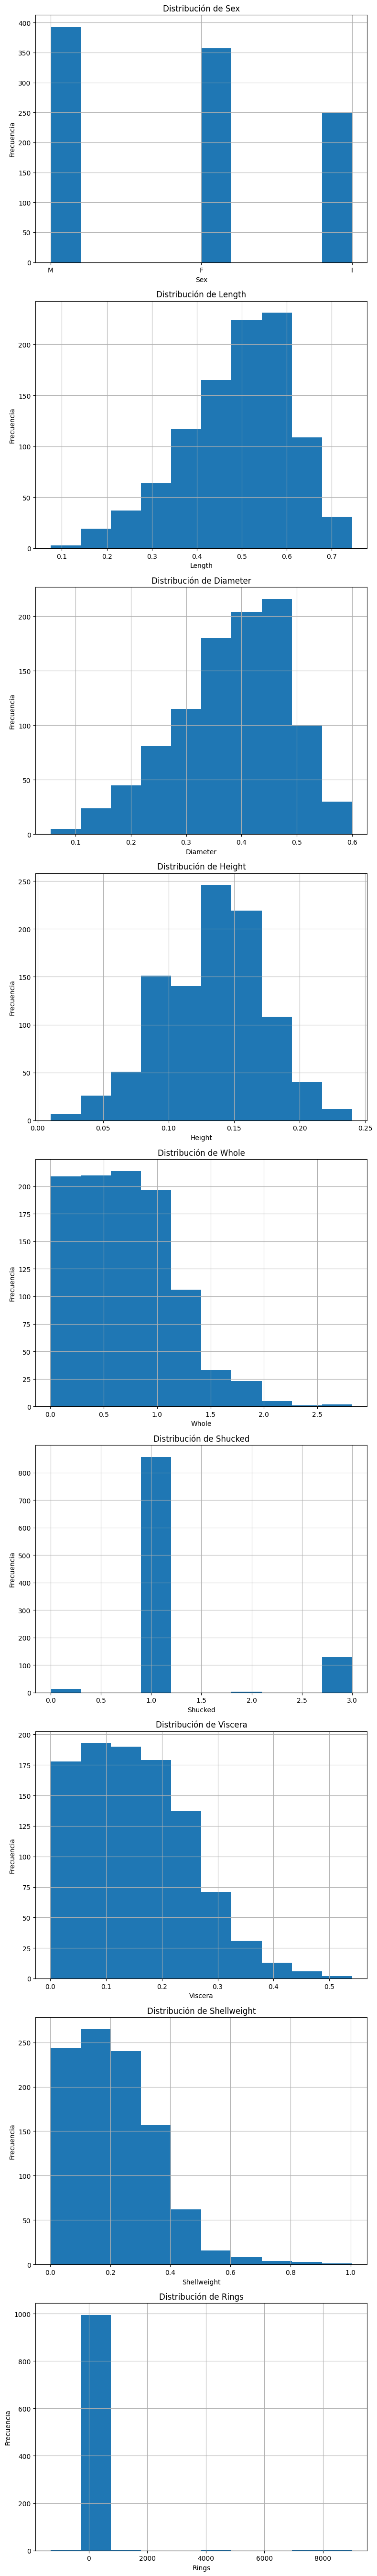

In [ ]:
# Obtener todas las columnas del DataFrame
variables = df.columns

# Configuración del tamaño de la figura
fig, axes = plt.subplots(len(variables), figsize=(8, 6*len(variables)))

# Bucle para crear los gráficos de cada variable
for i, variable in enumerate(variables):
    ax = axes[i]
    ax.hist(df[variable])
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {variable}')
    ax.grid(True)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Es importante comparar los histogramas antes y después del preprocesamiento de los datos de los atributos modificados. Podemos observar cómo todos los datos quedan representados de manera coherente y uniforme en todo el conjunto de datos. Esto evita inconsistencias y garantiza que los modelos o algoritmos utilicen la misma codificación para las mismas categorías. Al preprocesar los datos nominales y ordinales, podemos reducir la complejidad y la dimensionalidad de los datos permitiendo realizar análisis más precisos y eficientes, al eliminar redundancias y simplificar la representación de los datos.

7. Explore el siguiente material asociado a sesgo en NLP: Chang, K. W.,
Prabhakaran, V., & Ordonez, V. (2019). Bias and Fairness in Natural
Language Processing [tutorial]. Disponible en http://web.cs.ucla.edu/~kwchang/talks/emnlp19- fairnlp/


(a) ¿Cuál es su opinión al respecto del tema? Respalde su respuesta con
3 referencias (3 puntos)

Me parece un tema sumamente importante que no se le da la atención suficiente. Definir metodos y estrategias para abordar los sesgos y la equidad en el procesamiento del lenguaje natural (NLP) es un paso fundamental a la hora  de implementar estos sistemas. Si los modelos de NLP están sesgados, pueden perpetuar estereotipos dañinos y tratar a personas de manera desigual. Además, es importante ser precisos y confiables en lo que decimos y cómo lo decimos. Queremos que la tecnología sea justa, inclusiva y respetuosa con todos, para que podamos confiar en ella y tomar decisiones informadas sin preocuparnos de que exista desigualdad.

Bolukbasi et al. (2016) presentan un ejemplo concreto de sesgo de género en los embeddings de palabras utilizados en el procesamiento del lenguaje natural. Descubrieron que los modelos de lenguaje entrenados en grandes conjuntos de datos textuales mostraban asociaciones erróneas entre ciertas ocupaciones y géneros específicos. Por ejemplo, se encontró una alta similitud entre las palabras "hombre" y "programador de computadoras" y entre las palabras "mujer" y "ama de casa".

Igualmente,  Dixon et al. (2018) observó que el modelo implementado en su esudio tenía más probabilidades de recomendar a candidatos masculinos para roles técnicos, mientras que tendía a recomendar a candidatos femeninos para roles administrativos. Para mitigar este sesgo, los autores aplicaron técnicas de reequilibrio de datos y ajuste de umbrales en la clasificación. Esto implicó ajustar los umbrales de decisión para lograr una distribución equitativa de recomendaciones entre los géneros y reducir el sesgo implícito en las predicciones.

Por último, un ejemplo interesante para abordar el sesgo y la equidad en el NLP es el utilizado por Romanov, A., & Shivade, C. (2019). Los autores proponen un enfoque basado en el procesamiento del lenguaje natural y el aprendizaje automático para inferir el género de una persona en función de su nombre y otros elementos contextuales presentes en las biografías. Utilizando este enfoque, logran reducir significativamente el sesgo de género en los datos de entrenamiento sin necesidad de acceder directamente a la información de género de las personas.


(b) ¿Qué estrategia se debería definir para evitar los problemas de sesgo
y equidad en proyectos de Ciencias de datos? Respalde su respuesta
con 3 referencias (5 puntos)

-Recopilación y selección de datos equilibrados: Esta estrategia se centra en garantizar que los datos utilizados en el proyecto sean representativos y equilibrados en términos de las diferentes características o grupos relevantes. Es importante recopilar datos de manera que reflejen adecuadamente la diversidad de la población o fenómeno que se está estudiando. Esto ayuda a evitar la introducción de sesgos inherentes en los datos, ya que se asegura de que no haya una sobrerrepresentación o subrepresentación significativa de ciertos grupos. Calders y Verwer (2010)

-Evaluación y monitoreo constante: Zliobaite (2015) destaca realizar una evaluación continua de los modelos y algoritmos utilizados en el proyecto para identificar posibles sesgos y desequilibrios en los resultados. Se deben examinar métricas de rendimiento, como precisión, recall y F1-score, en diferentes grupos o subpoblaciones. Esto permite detectar disparidades injustas en el rendimiento del modelo entre diferentes grupos y abordar cualquier sesgo o desigualdad identificada.

-Mitigación del sesgo: se implementa al aplicar técnicas específicas para mitigar el sesgo en los datos y los modelos. Pueden utilizarse algoritmos de aprendizaje que consideren la equidad como una métrica objetivo durante el entrenamiento del modelo. Esto conlleva ajustar los pesos o costos asociados con diferentes grupos para asegurar que el modelo no favorezca injustamente a un grupo en particular. Además, se pueden utilizar técnicas de reequilibrio de datos, como el sobremuestreo, para garantizar que todas las clases o grupos estén representados adecuadamente en el conjunto de datos. Mitchell, Potash y Barocas (2019)

(c) Incluyan las referencias bibliográficas en formato APA (1 punto).

Bolukbasi, T., Chang, K. W., Zou, J. Y., Saligrama, V., & Kalai, A. T. (2016). Man is to computer programmer as woman is to homemaker? Debiasing word embeddings. In Advances in Neural Information Processing Systems

Dixon, L., Li, Y., Sorelle, A., Thain, N., & Vasserman, L. (2018). Measuring and mitigating unintended bias in text classification. In Proceedings of the 2018 AAAI/ACM Conference on AI, Ethics, and Society

Romanov, A., & Shivade, C. (2019). What's in a name? Reducing bias in bios without access to protected attributes. In Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing and the 9th International Joint Conference on Natural Language Processing

Mitchell, M., Wu, S., Zaldivar, A., Barnes, P., Vasserman, L., Hutchinson, B., ... & Gebru, T. (2019). Model cards for model reporting. In Proceedings of the 2019 Conference on Fairness, Accountability, and Transparency

Zliobaite, I. (2015). A survey on measuring indirect discrimination in machine learning. Data Mining and Knowledge Discovery

Calders, T., & Verwer, S. (2010). Three naive Bayes approaches for discrimination-free classification. Data Mining and Knowledge Discovery